# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Getting Data & Preparing](#Data-Prep)
    * [2.1 Importing Libraries & Functions](#import-packages)
    * [2.2 Reading Data](#read-data)
    * [2.2 Descriptive Analysis](#EDA)
* [3. Machine Learning Models](#ml-models)
* [4. Deployment of Model](#model-deployment)


# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>
  
<img src="https://www.partstrader.com/wp-content/uploads/2020/11/New-Vehicle-Sales-Infographic-02-789x1024.jpg">   
    
>**1.1 Problem Statement**<br>
Data of different types of cars is available along their attributes like engine type, horsepower, etc. The ask is to predit the automobile price based on the given characterstics.  

>**1.2 Importance of the Analysis**<br>The US automobile industry is worth 82.6 Billion Dollars which accounts for 3% of the US GDP. The industry is growing at an annual compound growth rate of 7.22%.  
Clearly, there are potential opportunities in predicitng to do in addressing this problem which can be beneficial to manufactures as well as customers.

>**1.3 Stakeholders**<br> Key Manufacturers , resellers or Automobile industry strategy experts

>**1.4 End Goal**<br>Accurate analysis, testing and prediction of price and back the story by data provided.    

* [Go to Top](#table-of-content)

# 2. Getting Data & Preparing <a class="anchor" id="Data-Prep"></a>
* [Go to Top](#table-of-content)

## 2.1 Importing the Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
>- Pandas : 
Used for data manipluation. Refer to Pandas Cheatsheet : https://www.datacamp.com/cheat-sheet/pandas-cheat-sheet-for-data-science-in-python <br>
>- Scikit-learn :
Useful and robust library for machine learning. Refer to SKlearn documentation : https://scikit-learn.org/stable/user_guide.html
>- target_by_cats() : A custom function, which calculates the mean of the target variable w.r.t to every categorical variable type and give the difference 
>- train_test_metrics() : This function produces the performance measure ('R2','Adj-R2','MAE','MAPE','SSE') for both training and test data in form of a table

In [401]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

In [402]:
def target_by_cats(X):
    '''
    This function assumes the input dataframe (X) has a numerically defined target
    variable in the first column and that all remaining features are categorical
    '''
    global_mean = X.iloc[:,0].mean()
    target = X.columns[0]
    for col in X.columns[1:]:
        df_group = X.groupby(by=col)[target].agg(['mean']).round(2)
        df_group['diff'] = (df_group['mean'] - global_mean).round(2)
        display(df_group)

In [403]:
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    
    train_metrics = [r2, adj_r2,
                     mean_absolute_error(y_train,y_hat).round(3),
                     mean_absolute_percentage_error(y_train,y_hat).round(3)*100,
                     (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
                    ]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    print(all_metrics)

## 2.2 Reading the data   <a class="anchor" id="read-data"></a>
>- Link for reading multiple types of input files https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
>- Note: Shift+Tab to look at the parameters any function can take/documentation
* [Go to Top](#table-of-content)

In [404]:
#Reading the data
pd.set_option('display.max_columns', None)
df = pd.read_csv('data (1).csv') 
#df.head() #df.tail()

## 2.3 Descriptive Analysis <a class="anchor" id="EDA"></a>
There are some common steps followed during any analysis however, may differ data to data. Keep following in mind:

>- Data Types & Definitions : what is the business aspect of the field name. Whether it is numeric or categorical
>- Explore your data : Look at the summary of the data (mean, medium, SD, Variance, etc)
>- Missing Value, Duplicates & Outlier Detection 
>- Missing value imputation: Drop/Replace
>- Correlation amongst the dependent variables/ Exisiting Pattern 
>- Identification of the predictors for the model : Making sure that it is actionable and the stakeholder cana ctually ammend it
>- Splitting the data into training and testing and build the classifier <br>
* [Go to Top](#table-of-content)

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Initial Observations
>- **Rows- 11,914 & Columns- 16** (3: float, 5: int, 8: object)
>- **Data Interpretation** <br><br>
| Feature          	                  | Comments                   	
|-------------------------------------|-------------------------------------------
| Make:                               | Name of the manufacture/brand <br>
| Model:                              |  Type <br>
| Year:                               |  Could be manufacturing year/ year in which started the model or current price <br>
| Engine Fuel Type:                   |  Vehicle energy source(seems important) <br>
| Engine HP:                          |   Horsepower (seems important) <br>
| Engine Cylinders:                   |   Number of cylinders (technical, can be important) <br>
| Transmission Type:                  |  Types of transmission (seems important) <br>
| Driven_Wheels:                      |  # of wheels causing vehicle to move <br>
| Number of Doors:                    |  # gates to open/close the wagon <br>
| Market Category:                    |  characteristic keyword (text, not sure whether to include in the analysis) <br>
| Vehicle Size:                       |  brief idea of capacity (imp) <br>
| Vehicle Style:                      |  Vehicle type/style (not sure) <br>
| highway MPG:                        |  Car's average on an open stretch road, highest mpg rating <br>
| city mpg:                           |  lowest mpg rating for a vehicle  <br>
| Popularity:                         |  rating by user? (Ambigous)<br>
| MSRP:                               |  Manufacturer suggested price   <br>

>- **Target Variable: MSRP (Manufacturer suggested price)** <br>
>- **We do not have any knowledge of the price/MSRP. Hence, assuming that MSRP column represents the price of the car when it was manufactured and not present value (based on data)**

In [406]:
#Testing MSRP relevanace whether the column represents current price or not
#sns.displot(x = df.Year, y= df.MSRP)                       #No it is safe to assume that the MSRP is the price during manufacturing, since the price increases with years which is contrary to any resale of a car

In [407]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Missing & Duplicates Records

>- Removing the duplicate rows first. In cases, where missing values needs to be imputed, the duplicates can sometimes skew the measures like mean.

In [408]:
#counting and removing the duplicates
#print(df.duplicated().value_counts())                               #715 Duplicates
df = df.drop_duplicates() 
df.shape                                                           #Dataframe Shape: 11199*16

(11199, 16)

In [409]:
#Finding and treating missing values
df.isnull().sum()                                                   # 3 columns have missing data

df['Market Category'].unique()                                      #observed Market Category is unharmonised text col with more 30% missing data
df = df.drop('Market Category',axis=1)                              #not sure is worth imputing and cleaning. Hence dropping the col for now

#Drop all rows that contain missing values
df = df.dropna()
#df.shape                                                           #Dataframe shape: 11097*15

#### Comments on Duplicates 
>- Duplicates count <br>
    * Unique rows       11199 <br>
    * Duplicate rows      715  <br>    
>- Dataframe post removing duplicates 11199 rows × 16 columns

#### Comments on Missing Values
Following columns have null values which can be imputed or dropped as per the needs.<br>

| Column         	    |# missing     | % missing rows                 	
|-----------------------|--------------|-----------------------------
| Engine Fuel Type:     | 3            |  0.02%   <br>
| Engine HP:            | 69           |  0.57%   <br>
| Engine Cylinders:     | 30           |  0.25%   <br>
| Market Category:      | 3742         |  31.0%   <br>

**we can delete the missing rows from the mentioned column except Market Category attribute.Since Market Category has more than 30% of missing data and not sure is worth imputing and cleaning, hence dropping the column. We'll circle back to Market Category if needed**. 

>- Dimension after removing the duplicates and dropping the missing value  : **11097*15**.

# Outlier Detection and Treatment 

 >- As per my understanding, I believe that outliers should be detected first before treating missing values, because if you plan to impute the missing values using mean (assuming), the imputed value can be influenced by large outlier values. However, we are dropping missing values, so for now it's won't be a matter of concern
 
* [Go to Top](#table-of-content)

In [410]:
#working on numerical columns first
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)

In [411]:
pd.DataFrame(dict(mean = df_numeric.mean().round(2),
                  median = df_numeric.median().round(2),
                  std_dev = df_numeric.std().round(2),
                  min_val = df_numeric.min(),
                  max_val = df_numeric.max(),
                  missing_vals = df_numeric.isnull().sum()
                  
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
Year,2010.69,2015.0,7.24,1990.0,2017.0,0
Engine HP,253.53,240.0,110.16,55.0,1001.0,0
Engine Cylinders,5.69,6.0,1.77,0.0,16.0,0
Number of Doors,3.45,4.0,0.87,2.0,4.0,0
highway MPG,26.27,25.0,7.48,12.0,354.0,0
city mpg,19.30,18.0,6.60,7.0,137.0,0
Popularity,1557.21,1385.0,1443.81,2.0,5657.0,0
MSRP,41901.12,30600.0,61730.62,2000.0,2065902.0,0


>- Table Interpretation: <br>
   **Year** : We have more than 25 years of historic data (1990-2017) with maximum observations recorded in 2015 <br>
   **Engine HP, Engine Cylinders, # of doors, Highway MPG and City MPG** seem to clean columns with no extreme outliers <br>
   **Popularity & MSRP** (target variable), have outliers which can be indicated by difference in the mean and median. <br>(Popularity is an ambigous column like number of users reviewed, so not sure as of now about it)


<AxesSubplot:xlabel='MSRP'>

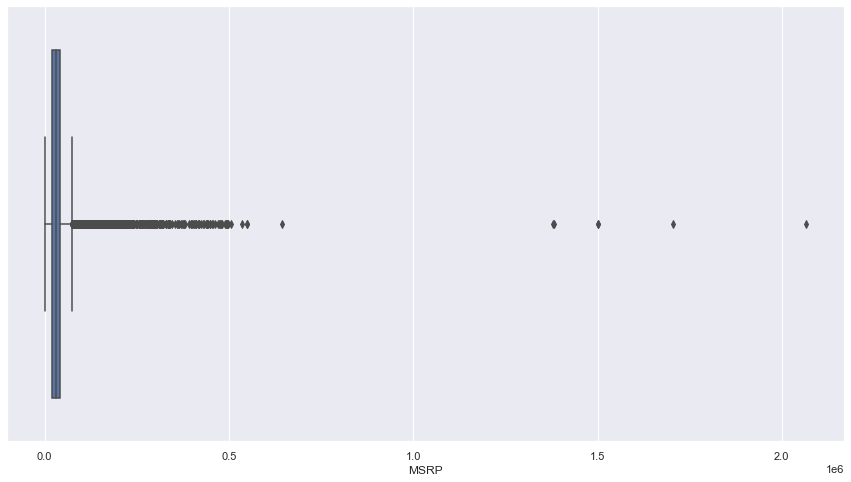

In [412]:
#detection of outlier in the target variable
sns.boxplot(x = df_numeric["MSRP"])  

**Boxplot Comments:**
>- It shows a wide range of dstribution for the target variable, however, key highlights are the outliers
>- From the boxplot, very high value of the target variable can be seen which indicates the presence of extreme outlier
>- Seems like that MSRP axis is in Millions, we can further drill down to look at the exact values

* Positive Outliers
>- Cars over 1M seems strange: These extremely high values/outliers can be vintage/luxury cards. can use this assumptions for caping/treating the outliers

In [413]:
#Further outliers drill down
df_numeric.sort_values(by='MSRP',ascending=False).iloc[0:10,:]  

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
11362,2008,1001.0,16.0,2.0,14,8,820,2065902
11364,2009,1001.0,16.0,2.0,14,8,820,1705769
8486,2008,650.0,12.0,2.0,14,9,1158,1500000
11363,2008,1001.0,16.0,2.0,14,8,820,1500000
6351,2012,620.0,12.0,4.0,16,10,67,1382750
6350,2011,620.0,12.0,4.0,16,10,67,1380000
4024,2003,660.0,12.0,2.0,12,7,2774,643330
1626,2015,720.0,12.0,2.0,16,10,1158,548800
1622,2014,720.0,12.0,2.0,16,10,1158,548800
1629,2016,750.0,12.0,2.0,18,11,1158,535500


* Negative Outliers
>- Outliers towards the lower end of target variable (extremely less than mean can be seen in the distribution, which needs further investigation)

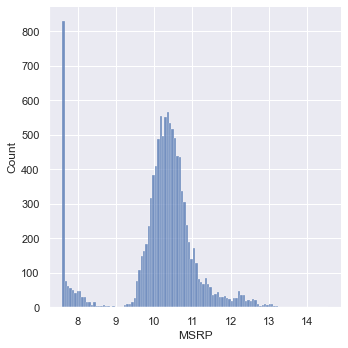

In [414]:
sns.displot(np.log1p(df.MSRP))

In [415]:
# looking at the less than average value for outliers
df_numeric.sort_values(by='MSRP',ascending= True).iloc[0:10,:]

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
3644,1996,199.0,6.0,3.0,15,11,5657,2000
3661,1997,200.0,6.0,3.0,17,12,5657,2000
3663,1997,200.0,6.0,3.0,17,12,5657,2000
7186,2000,132.0,4.0,4.0,31,24,535,2000
7185,1999,150.0,4.0,4.0,36,24,535,2000
7182,1999,132.0,4.0,4.0,36,24,535,2000
7181,1999,150.0,4.0,2.0,36,24,535,2000
3658,1996,145.0,6.0,3.0,13,11,5657,2000
7180,1999,132.0,4.0,2.0,36,24,535,2000
1006,1997,181.0,6.0,4.0,24,16,870,2000


- It is strange that the first 10 rows have same values, looking for all the values where price is 2000 dollars

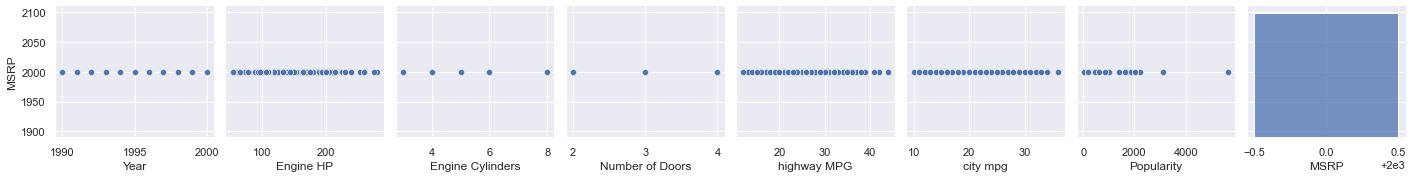

In [416]:
df_temp = df_numeric[df_numeric['MSRP'] == 2000] #~750 rows have same value, could be coincidental but can be garbage value assigned to the subset of the data
sns.pairplot(df_temp,y_vars = 'MSRP') 

* **Pairplot comments**
>- Proving the assumption that 2000 which are the negative outliers are garbage value in the system. Hence looking at the subset of data.
>- It is clear that we can delete the records where the price is 2000 as it is garbage value given to the system, could be due to lack of data availability during 1990's

In [417]:
# Remove outliers based on thresholds described above
print('Number of records BEFORE outlier handling:', len(df))
df = df[df['MSRP'] < 1000000]
df = df[df['MSRP'] > 2000]
print('Number of records AFTER outlier handling:', len(df))

Number of records BEFORE outlier handling: 11097
Number of records AFTER outlier handling: 10343


- Threshold Rational : Average car price in US 40K for mass produced models and 90k for luxory

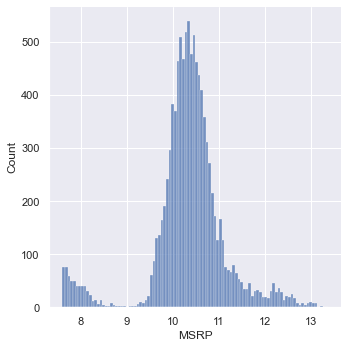

In [418]:
sns.displot(np.log1p(df.MSRP) )

### Outlier Summary 

- Popularity: an ambigous column like number of user, Unsure as of now about it, will circle back and treat outlier if needed
- MSRP - both at the high and low end of the distribution. 
    - High end : Capped the price less than 1M (assuming that and average rate of a car in USA is 40K for mass production & 75K for luxury as the stakeholder can be interprested in both)
    - Low End: Capped the data for price more than 2000. Since we noticed that there are still outlier which have price less than 2000 (mostly in 1990's). so on further investigation, it can be concluded that 2000 was a garbage value given to the system assuming the unavailability of the data during previous decade

- After removing the outliers, the price distribution apprears to be in a normal distribution curve (not perfect though)

* [Go to Top](#table-of-content)

## Visually understanding the columns distribution

C:\Users\vsagar3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


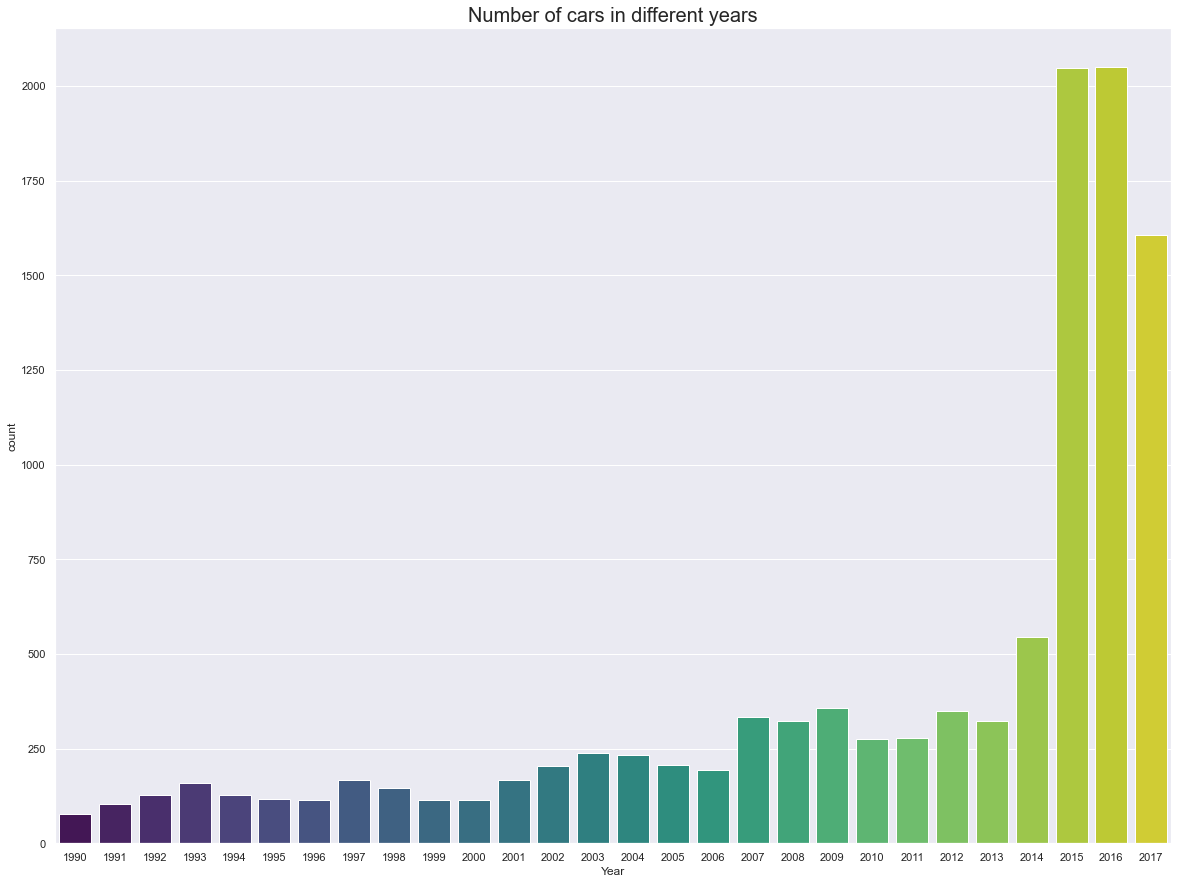

In [419]:
# Looking at Yearl wise distribution of the cars
plt.figure(figsize = (20, 15))
sns.countplot(df_numeric.Year, palette = 'viridis')
plt.title("Number of cars in different years", fontsize = 20)
plt.show()
#want to add mean price

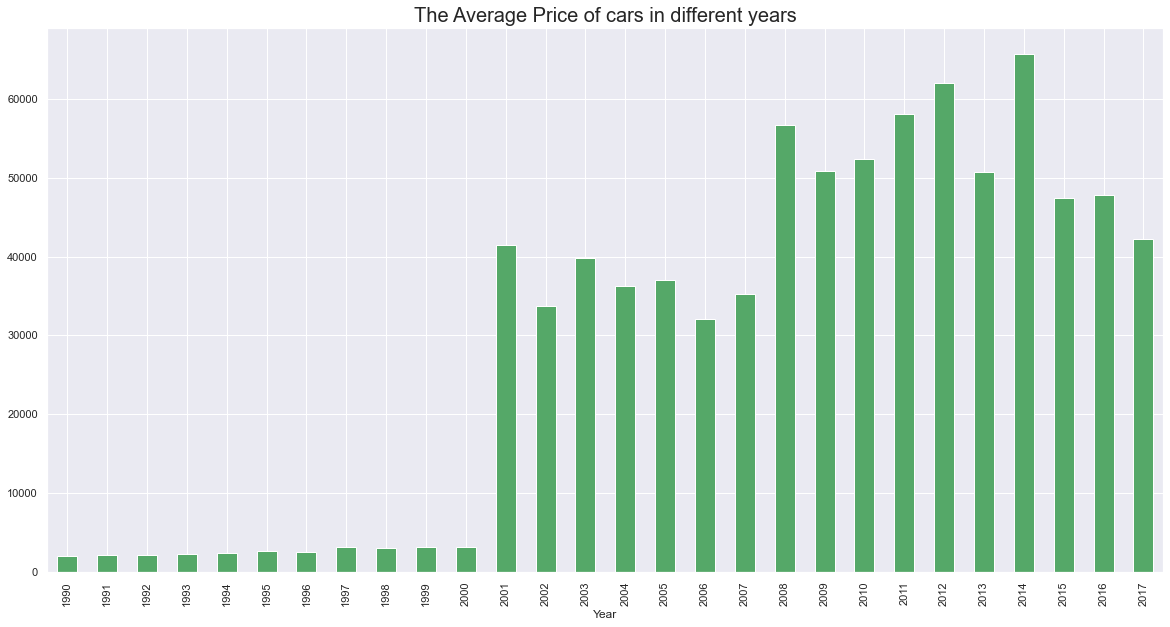

In [420]:
plt.figure(figsize = (20, 10))
df_numeric.groupby('Year')['MSRP'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()

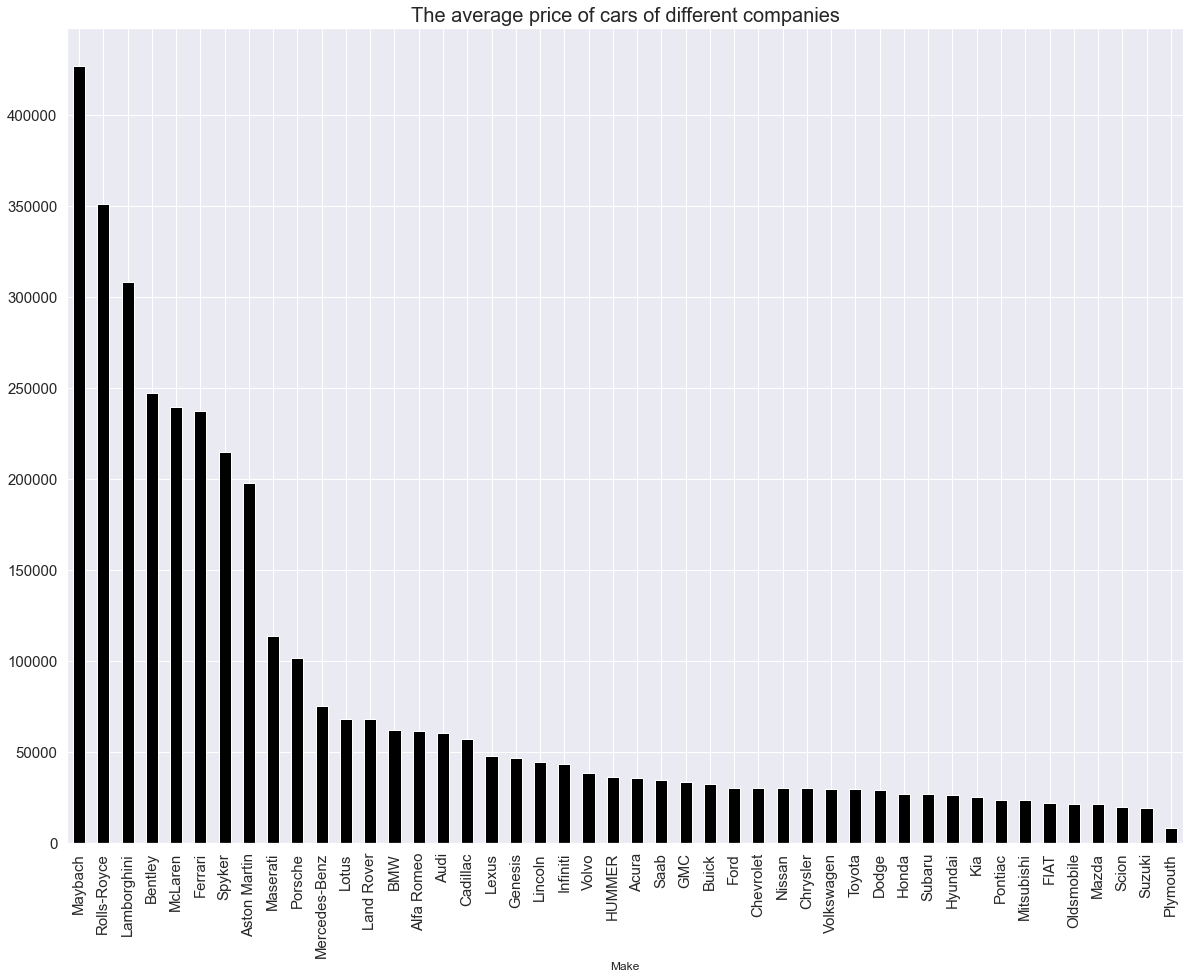

In [421]:
plt.figure(figsize = (20, 15))
df.groupby(['Make']).mean()['MSRP'].sort_values(ascending = False).plot(kind = 'bar', fontsize = 15, color = 'black')
plt.title("The average price of cars of different companies", fontsize = 20)
plt.show()

#### Visualisations
1. **Number of Cars in different years** : A descent trend is evident untill 2015 where the number of cars manufactured accelerated. I am not sure whether it is okay to conclude that post 2015, drastically more cars manufactured. It can be an imbalance in recording the data
2. **Average price of car in different years**: Untill 2000, the car prices were almost constant (can be removed but keeping data size in mind considering them). from 2001-2014, an upwards trends of the prices every year is evident. However, post 2014, once the prices of the cars were reduced, more number of cars were sold in following years which makes a lot of sense.
3. **The average price of cars of different companies** : It is expected to see thet top priced cars would mostly be luxury.

## Feature Selection

* Using the understanding from the visuals
* Check for correlation : what all variables have a strong relation with the target variable
* Check for Multicolinearity : Are the highly related variable show any sign of dependence amongst each other
* [Go to Top](#table-of-content)

In [422]:
numeric_vals = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity','MSRP']

# Checking Correlation & Multicolinearity

>- Correlation Interpretation from the plot above: <br>
    'Year' <br>
    'Engine HP' (+++) <br>
    'Engine Cylinders' (+++) <br>
    'Number of Doors', (-) <br>
    'highway MPG' (-) <br>
    'city mpg', (--) <br>
    'Popularity', (neglibile correlation , can be removed from the model) <br>
>- Checking if highly correlated columns with price have high correlation amonst each other
    - **Engine HP and cyclinder are highly correlated to each. Can drop post some general info on horsepower & cyclinder**
    - **Higway MPG & City MPG are also higly correlated, can drop one of them**.
    

<AxesSubplot:>

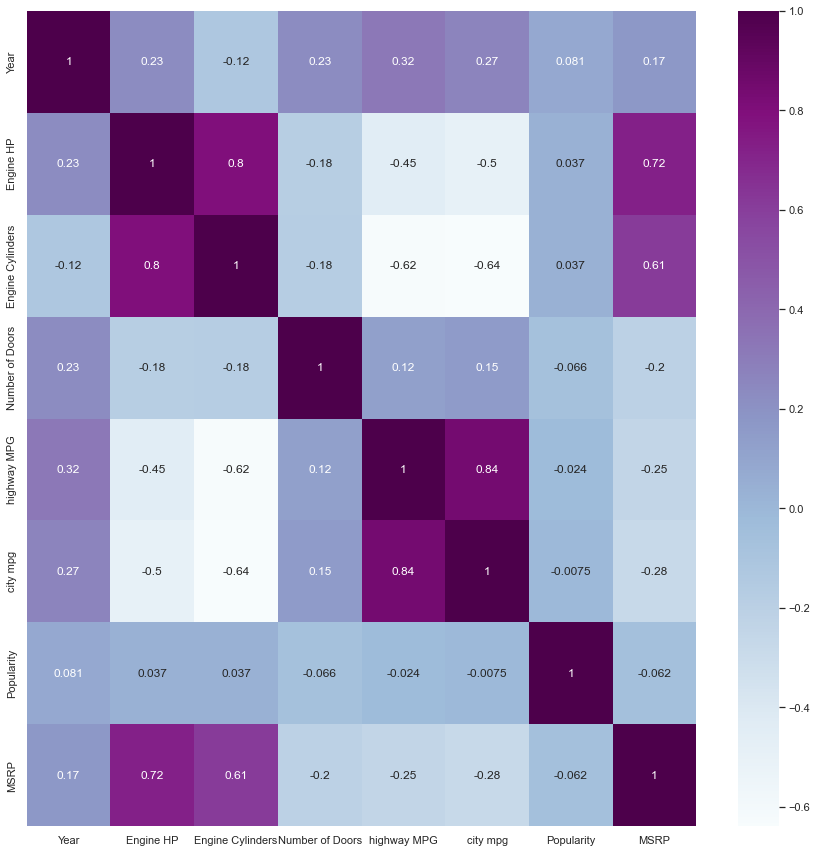

In [423]:
plt.figure(figsize = (15, 15))
numeric_columns = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors','highway MPG', 'city mpg', 'Popularity','MSRP']
heatmap_data = df[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

In [424]:
df = df.drop(['Popularity','city mpg','Engine Cylinders','Year'],axis = 1)

## Correlation & Multicolinearity Summary

>- Positive correlation with Target variable : **Engine HP**, Engine Cylinders , Year (low)
>- Negative correlation with Target variabe : Number of Doors, **highway MPG**, city mpg
>- Correlation less than 0.1 shows neglible correlation however, Number of Doors, Highway MPG, city MPG seems be to imp features from the business end and can have non linear relation which we can see from the charts below and further select them for the model
>- Dropped popularity, Enginer Cyclinder & City mpg due to low correlation and multicolinearity. ALso, Year shows a great trend pricing trend but is not intiutive in prediciting prices

## Categorical Variables Cleaning/Treatment

In [425]:
# Create temp dataframe with target and categorical variables only
categorical = ['object']
X = pd.merge(df['MSRP'],df.select_dtypes(include=categorical),left_index=True,right_index=True)

# Compute average target values for all categorical alternatives (using the function created above)
target_by_cats(X)

,mean,diff
Make,,
Acura,35914.68,-7974.55
Alfa Romeo,61600.00,17710.77
Aston Martin,198123.46,154234.23
Audi,60395.48,16506.25
BMW,62162.56,18273.33
Bentley,247169.32,203280.09
Buick,32214.68,-11674.55
Cadillac,57346.61,13457.38
Chevrolet,30289.71,-13599.52


,mean,diff
Model,,
1 Series,38276.67,-5612.56
1 Series M,46135.00,2245.77
124 Spider,26895.00,-16994.23
2,15821.67,-28067.56
2 Series,41697.06,-2192.17
...,...,...
iQ,16168.75,-27720.48
tC,21546.43,-22342.80
xA,12996.67,-30892.56


,mean,diff
Engine Fuel Type,,
diesel,41175.70,-2713.53
electric,34511.92,-9377.31
flex-fuel (premium unleaded recommended/E85),48641.92,4752.69
flex-fuel (premium unleaded required/E85),160692.26,116803.03
flex-fuel (unleaded/E85),36279.22,-7610.01
natural gas,28065.00,-15824.23
premium unleaded (recommended),41761.78,-2127.45
premium unleaded (required),98742.01,54852.78
regular unleaded,26583.09,-17306.14


,mean,diff
Transmission Type,,
AUTOMATED_MANUAL,96815.56,52926.33
AUTOMATIC,43030.72,-858.51
DIRECT_DRIVE,33620.00,-10269.23
MANUAL,33732.72,-10156.51
UNKNOWN,4824.86,-39064.37


,mean,diff
Driven_Wheels,,
all wheel drive,56711.82,12822.59
four wheel drive,38333.09,-5556.14
front wheel drive,25645.05,-18244.18
rear wheel drive,60179.83,16290.60


,mean,diff
Vehicle Size,,
Compact,37596.90,-6292.33
Large,55982.25,12093.02
Midsize,42243.50,-1645.73


,mean,diff
Vehicle Style,,
2dr Hatchback,21109.07,-22780.16
2dr SUV,20358.95,-23530.28
4dr Hatchback,23400.97,-20488.26
4dr SUV,40993.52,-2895.71
Cargo Minivan,22803.73,-21085.50
Cargo Van,21115.47,-22773.76
Convertible,87853.78,43964.55
Convertible SUV,26850.00,-17039.23
Coupe,79555.26,35666.03


## Categorical Variables Interpretation

>- Make - It has 47 unique values which can be bucket into categories based on the price variance from mean. Negative mean difference of make type might represent set of cars that are cheaper as compared to the other like Rolls-Royce. Will try to create a bucket of luxury and Economy <br>
>- Model - 817 unique types, thinking to drop rhis column to reduce the complexity of the model. Based on the prediction, I will circle back on this. <br>
>- Engine Fuel Type - 10 types of fuel, it seems to be an important column. (Again based on the model performance, multiple types of flex-fuel can be clubbed, hoever for now will consider converting dummy variable) <br>
>- Transmission type - Assuming this to be an crutial variable in price prediction with just 4 sensible transmission type <br>
>- Driven_wheel - Unsure of this, however, will consider in model and compare the performance with this variable presence
>- Vehicle size - Capacity seems to be an important variable with 3 types. However can be tested basd on the hypothesis while runnnig model
>- Vehicle Style - will deal with the categories later if needed

### Checking relationship between the categorical independent and dependent variable

**Questions to ponder for selecting categorical variables**
* I have seem most of the luxury cars have 2 doors, does my data support this?
* How does the type of fuel impact the horsepower of the car and it's pricing?
* Do number of wheels used in starting a vehicle related to price? 
* Do Vehicle style has any relationship with the price?

Text(0.5, 1.0, 'Relationship between number of doors and price')

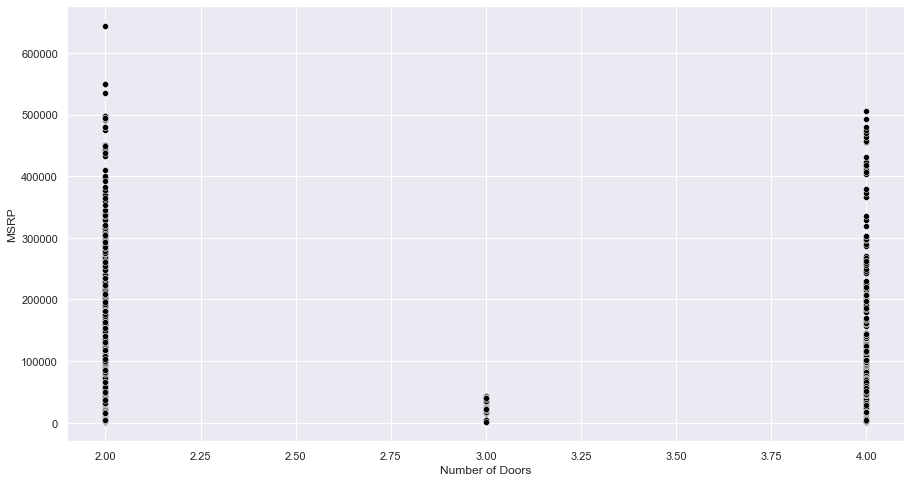

In [426]:
#groupby/trend price by # of doors
sns.scatterplot(x = df['Number of Doors'], y= df.MSRP, color = 'black' ) #will cap the axis to integer
a.set_title('Relationship between number of doors and price')

* **I have seem most of the luxury cars have 2 doors, does my data support this?**
>- Assumption that luxury cars have only 2 doors does not seem to be valid for our analysis. Hence will **drop number of doors columns**

Text(0.5, 1.0, 'Price of vehicle wrt Engine fuel type and Highway MPG')

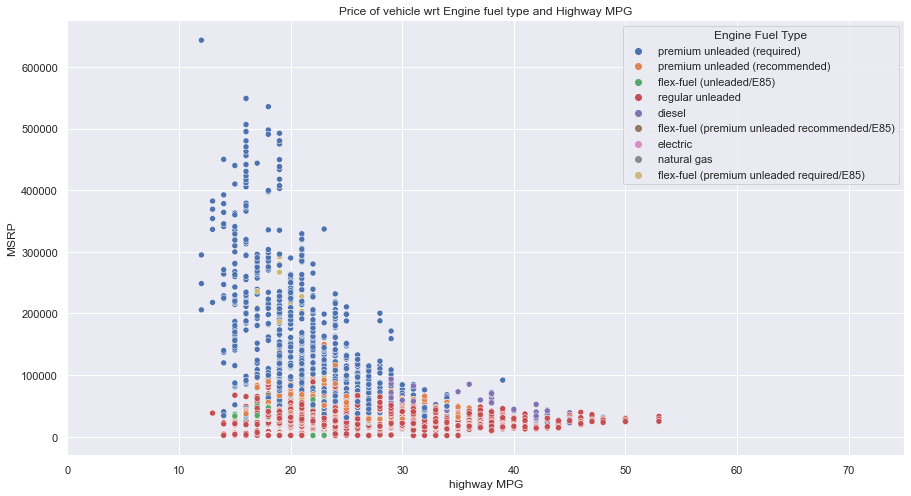

In [427]:
#groupby/trend price by city mgp
a = sns.scatterplot(x = df['highway MPG'], y= df['MSRP'], hue = df['Engine Fuel Type'] ) #Non linear relation between city mpg & price is evident as per the assumption
a.set_xlim(0,75)
a.set_title('Price of vehicle wrt Engine fuel type and Highway MPG')

* **How does the type of fuel impact the millege of the car and it's pricing?**
>- Premium unleaded (required) provides great MPG on highway as per the data

Text(0.5, 1.0, 'Impact on Engine horsepower by Fuel Type')

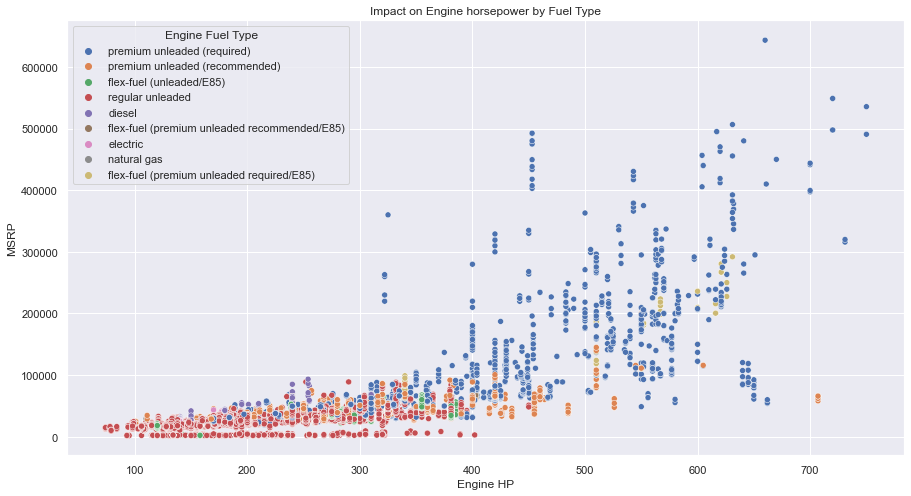

In [428]:
#groupby/trend price by city mgp
a = sns.scatterplot(x = df['Engine HP'], y= df['MSRP'], hue = df['Engine Fuel Type'] ) 
#a.set_xlim(0,75)
a.set_title('Impact on Engine horsepower by Fuel Type')

* **How does the type of fuel impact the horsepower of the car and it's pricing?**
>-It is recommended to use Premium unleaded engine fuel type as it utlises engines' horsepower to its potential. 
>- Mostly less priced vehicles, uses regular fuel.
>- can use Fuel type going forward in the model

Text(0.5, 1.0, 'number of wheels used in starting a vehicle versus price')

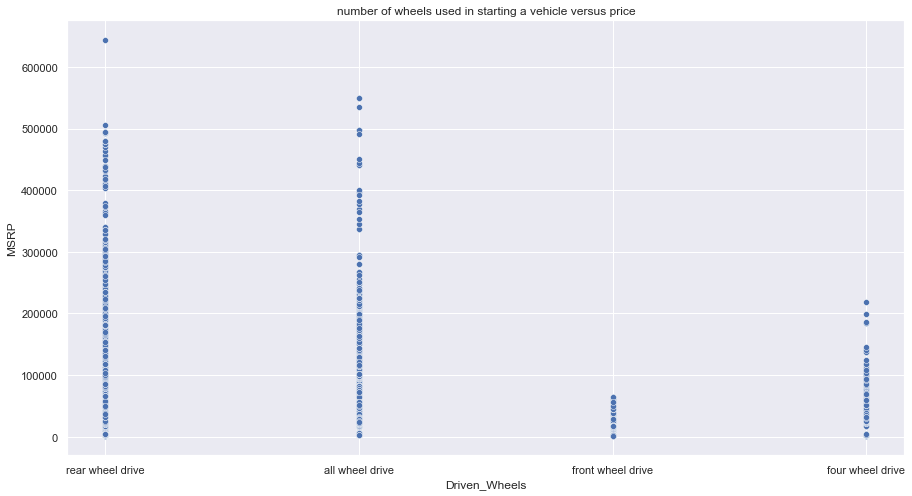

In [429]:
a = sns.scatterplot(y = df['MSRP'], x= df['Driven_Wheels'] ) 
#a.set_xlim(0,75)
a.set_title('number of wheels used in starting a vehicle versus price')

* **Do number of wheels used in starting a vehicle related to price?**
>- Assuming that Economy cars generally use front front wheel drives & four wheel drives for initial kick on a car, which can be a good predictor for my model (let's see)

In [430]:
m = {"Coupe": ['Coupe'],
     "Convertible": ['Convertible'],
     "Sedan": ['Sedan'],
     'Wagon':['wagon'],
     'Hatchback':['4dr Hatchback','2dr Hatchback'],
     'SUV':['4dr SUV','2dr SUV','Convertible SUV'],
     'Van':['Passenger Minivan','Cargo Minivan','Cargo Van','Passenger Van'],
     'Pickup':['Crew Cab Pickup','Regular Cab Pickup','Extended Cab Pickup']
    }

# convert mapping above into a temporary dataframe
temp = pd.Series(m).explode().sort_values().to_frame().reset_index()
# give the columns names for easier merging
temp.columns = ['New Vehicle Style','Vehicle Style']
# update df to include new vehicle style - use left join
df = pd.merge(left = df,right = temp, how='left', left_on='Vehicle Style', right_on='Vehicle Style')
# drop old vehicle style variable
df.drop('Vehicle Style',axis=1,inplace=True)

Text(0.5, 1.0, 'number of wheels used in starting a vehicle versus price')

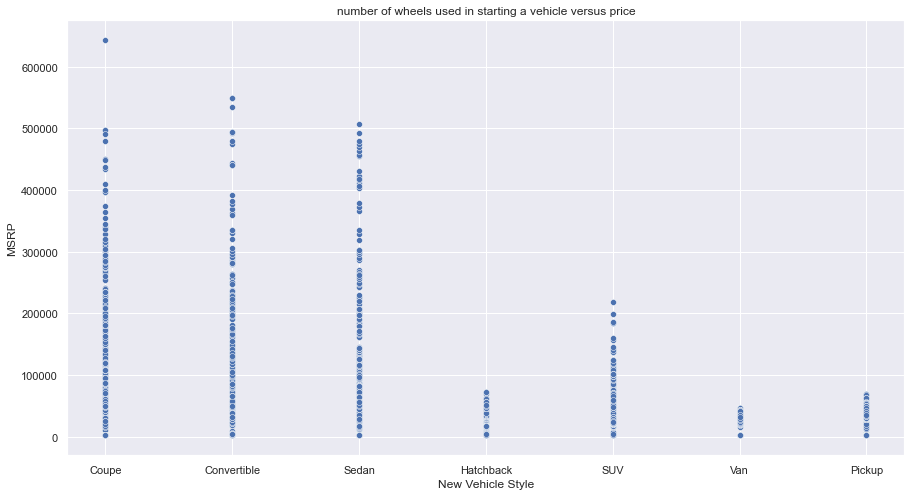

In [431]:
a = sns.scatterplot(y = df['MSRP'], x= df['New Vehicle Style'] ) 
#a.set_xlim(0,75)
a.set_title('number of wheels used in starting a vehicle versus price')

* **Do Vehicle style has any relationship with the price?**
>- Not very intuitive, but can compare the performance

In [432]:
df = df.drop(['Make','Model','Number of Doors'],axis =1)            

**Feature Selection Summary:**
1. Dropped the following variables post analysis: 
    number of doors : It fails the assumption, and does not hold any relation with the target variable
    Make & Model: Both Make & Model has multiple categories and for this analysis, the stakeholder (reseller/industry expert would like to focus on the actionable features
    'Popularity','Year' - No/Less Correlation with the target
    'city mpg','Engine Cylinders', - Multicoinearity
    
2. **Final Features selected : Engine Fuel Type, Transmission Type, Driven_wheels[front wheel drive],Driven_wheels[four wheel drive], Vehicle style, Engine HP, Highway MPG, Vehicle Size**

# Transformation & Creating dummy data variables

In [433]:
# Create a new version of 'price' - a log tranformation
df['ln_price'] = np.log1p(df['MSRP'])

In [434]:
# Flag categorical variables and convert to dummies
cat_vars = ['Engine Fuel Type','Transmission Type','Driven_Wheels','Vehicle Size','New Vehicle Style']
# Loop over categorical vars and encode each one
for var in cat_vars:
    df[var] = df[var].astype("category")

df = pd.get_dummies(df,columns=cat_vars, prefix_sep='_', drop_first=True)

In [435]:
df.columns

Index(['Engine HP', 'highway MPG', 'MSRP', 'ln_price',
       'Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_natural gas',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_four wheel drive',
       'Driven_Wheels_front wheel drive', 'Driven_Wheels_rear wheel drive',
       'Vehicle Size_Large', 'Vehicle Size_Midsize', 'New Vehicle Style_Coupe',
       'New Vehicle Style_Hatchback', 'New Vehicle Style_Pickup',
       'New Vehicle Style_SUV', 'New Vehicle Style_Sedan',
       'New Vehicle Style_Van'],
      dtype='object')

# Dividing the data into test & train

* [Go to Top](#table-of-content)

In [436]:
predictors =['Engine HP', 'highway MPG', 
       'Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_natural gas',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_four wheel drive',
       'Driven_Wheels_front wheel drive', 'Driven_Wheels_rear wheel drive',
       'Vehicle Size_Large', 'Vehicle Size_Midsize', 'New Vehicle Style_Coupe',
       'New Vehicle Style_Hatchback', 'New Vehicle Style_Pickup',
       'New Vehicle Style_SUV', 'New Vehicle Style_Sedan',
       'New Vehicle Style_Van']

target = ['ln_price']

X = df[predictors]
y = df[target]


In [437]:
# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=2)

## Machine Learning Models <a class="anchor" id="ml-models"></a>

In [438]:
#Model 1 : 1 Variable (Engine HP)
simple_var = ['Engine HP']
model1 = LinearRegression()
model1.fit(X_train[simple_var],y_train)
# Display Output
train_test_metrics(X_train[simple_var],X_test[simple_var],y_train,y_test,model)  #Good accuracy but poor dependence & fit

           Train      Test
R2         0.483     0.485
Adj-R2     0.482     0.484
MAE        0.353     0.348
MAPE       3.700     3.700
SSE     2619.363  1109.884


In [439]:
# Since our target variable was tranformed with the natural log function
# we need to do the following conversion of our predictor variable coefficient
# to more easily interpret it
print('Engine HP:', round((math.exp(model1.coef_[0][0])-1)*100,2))

Engine HP: 0.53


#### Model 1 Summary: 
**Simple linear model: Variable selected - Engine HP** 
 >- Rationale is that Engine HP is the most highly correlated variable with the target varaible. (Additionally, domain knowledge also suggest horsepower as a crutial factor while buying/pricing any automobile.  
>- MAPE for training data: 3.7 & MAPE for test data: 3.7

**Coefficient Interpretation:**
>- Engine HP = 0.53, which says that for each unit of increase in engine HP, half a percent of the automobile prices changes (keeping other features constant)

**Model Interpretation:**
>- Model performance measures give descently same results for training and testing data, which shows no sign of overfitting/underfitting. Which means for every 100 training and predictions, the Mean absolute error % is ~4% only, which in general is a very good. However, in our model, It can be tricky to look at MAPE and assume that it is a good model with good accuracy because the movement of the Target variable based on Engine HP is very poor shown by R2 value which aligns with the overall problem as well, because as a manufacturer, one can not depend on one factor for deciding it's prices which drives sales

**Model 2**

Instructions:
Regression model with TWO predictors: one numeric,one categorical:
Sticking with Engine HP for the one numeric predictor
For categorical variable I'll go with 'Engine Fuel Type' and it's indicators


In [440]:
#Model 2 : 2 Variables ('Engine HP','Engine Fuel Type') - Type 1
predictors = ['Engine HP','Engine Fuel Type_electric']

model2 = LinearRegression()
model2.fit(X_train[predictors],y_train)

# Display Output
train_test_metrics(X_train[predictors],X_test[predictors],y_train,y_test,model2) ##Good accuracy but still poor dependence & fit

           Train      Test
R2         0.483     0.486
Adj-R2     0.483     0.485
MAE        0.353     0.347
MAPE       3.700     3.700
SSE     2616.482  1107.744


In [441]:
print('Engine HP:', round((math.exp(model2.coef_[0][0])-1)*100,2))
print('Engine Fuel Type:', round((math.exp(model2.coef_[0][1])-1)*100,2))

Engine HP: 0.53
Engine Fuel Type: 76.2


In [442]:
  #Model 2 : 2 Variables ('Engine HP','Engine Fuel Type') - Type2
predictors = ['Engine HP',        
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_natural gas',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded'
             ]

model2 = LinearRegression()
model2.fit(X_train[predictors],y_train)

# Display Output
train_test_metrics(X_train[predictors],X_test[predictors],y_train,y_test,model2) 

           Train      Test
R2         0.532     0.527
Adj-R2     0.532     0.527
MAE        0.342     0.343
MAPE       3.600     3.600
SSE     2369.932  1017.570


In [443]:
print('Engine HP:', round((math.exp(model2.coef_[0][0])-1)*100,2))
print('Engine Fuel Type_flex-fuel (premium unleaded recommended/E85):', round((math.exp(model2.coef_[0][1])-1)*100,2))
print('Engine Fuel Type_flex-fuel (premium unleaded required/E85)', round((math.exp(model2.coef_[0][2])-1)*100,2))
print('Engine Fuel Type_flex-fuel (unleaded/E85)', round((math.exp(model2.coef_[0][3])-1)*100,2))
print('Engine Fuel Type_natural gas', round((math.exp(model2.coef_[0][1])-1)*100,2))
print('Engine Fuel Type_premium unleaded (recommended)', round((math.exp(model2.coef_[0][2])-1)*100,2))
print('Engine Fuel Type_premium unleaded (required)', round((math.exp(model2.coef_[0][3])-1)*100,2))
print('Engine Fuel Type_regular unleaded', round((math.exp(model2.coef_[0][3])-1)*100,2))

Engine HP: 0.43
Engine Fuel Type_flex-fuel (premium unleaded recommended/E85): -17.36
Engine Fuel Type_flex-fuel (premium unleaded required/E85) -2.78
Engine Fuel Type_flex-fuel (unleaded/E85) -41.38
Engine Fuel Type_natural gas -17.36
Engine Fuel Type_premium unleaded (recommended) -2.78
Engine Fuel Type_premium unleaded (required) -41.38
Engine Fuel Type_regular unleaded -41.38


## Model 2 Summary and Type 1 & 2 Comparision:

>**Model Summary:**<br> : Engine HP & Engine Fuel Type
>Clearly, our 2 variable linear regression model does explain the variation in prices upto 48% in type 1 model however, when the indicator variables are added in the model, there is evident improvement in the model and over 50% of the price variation can be explained by our model 2, type 2.
<br><br>

>**Variable selection rational can be seen above (add link to the top):**<br> 

>**Coefficient Interpretation:**<br>

>- **Type1**
    >Engine HP = 0.56 
    >Engine Fuel Type = 76.2
    >It means that for every 1 litre of Engine Fuel type and horsepower increase, the price will increase by 0.56 Horsepower + 76.2 Fuel type, keeping other things held constant. 

>- **Type2**
>Engine HP: 0.43 <br>
>Engine Fuel Type_flex-fuel (premium unleaded recommended/E85): -17.36 <br>
>Engine Fuel Type_flex-fuel (premium unleaded required/E85) -2.78 <br>
>Engine Fuel Type_flex-fuel (unleaded/E85) -41.38 <br>
>Engine Fuel Type_natural gas -17.36 <br>
>Engine Fuel Type_premium unleaded (recommended) -2.78 <br>
>Engine Fuel Type_premium unleaded (required) -41.38 <br>
>Engine Fuel Type_regular unleaded -41.38 <br>

>- In model 2, type 2, the coefficient of HP decreased as compared to the model 1 type 1 as the variations are explained by the different types of the fuel type. I did not further bucket the fuel type because even for flex there are different coefficients and the impact of different types of the engine fuel on price is different

>**Overfitting:**<br>
>- No overfitting here - not expecting it given in a simple model.
>- I'm also not too surprised that our test performance and training performance are quite similar
>- Based on the MAPE of both types of model, the error would only be ~4% 

#Note - not sure why on adding the indicator variable for fuel type instead of the Column, the coefficient changed for horsepower.

## Model -3 

In [395]:
#Model 3 : running hte model with all the 24 predictors
predictors =['Engine HP', 'highway MPG', 
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_natural gas',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       #'Transmission Type_UNKNOWN', 
       'Driven_Wheels_four wheel drive',
       'Driven_Wheels_front wheel drive', 'Driven_Wheels_rear wheel drive',
       'Vehicle Size_Large', 'Vehicle Size_Midsize', 'New Vehicle Style_Coupe',
       'New Vehicle Style_Hatchback', 'New Vehicle Style_Pickup',
       'New Vehicle Style_SUV', 'New Vehicle Style_Sedan',
       'New Vehicle Style_Van']

model3 = LinearRegression()
model3.fit(X_train[predictors],y_train)
# Display Output
train_test_metrics(X_train[predictors],X_test[predictors],y_train,y_test,model3) ##Good accuracy but better dependence & fit

           Train     Test
R2         0.625    0.631
Adj-R2     0.624    0.631
MAE        0.320    0.316
MAPE       3.300    3.300
SSE     1900.494  794.805


In [400]:
print('Engine HP:', round((math.exp(model3.coef_[0][0])-1)*100,2))
print('highway MPG', round((math.exp(model3.coef_[0][1])-1)*100,2))
print('Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)', round((math.exp(model3.coef_[0][2])-1)*100,2))
print('Engine Fuel Type_flex-fuel (premium unleaded required/E85)', round((math.exp(model3.coef_[0][3])-1)*100,2))
print('Engine Fuel Type_flex-fuel (unleaded/E85)', round((math.exp(model3.coef_[0][4])-1)*100,2))
print('Engine Fuel Type_natural gas', round((math.exp(model3.coef_[0][5])-1)*100,2))
print('Engine Fuel Type_premium unleaded (recommended)', round((math.exp(model3.coef_[0][6])-1)*100,2))
print('Engine Fuel Type_premium unleaded (required)', round((math.exp(model3.coef_[0][7])-1)*100,2))
print('Transmission Type_AUTOMATIC:', round((math.exp(model3.coef_[0][8])-1)*100,2))
print('Transmission Type_DIRECT_DRIVE', round((math.exp(model3.coef_[0][9])-1)*100,2))
print('Transmission Type_MANUAL', round((math.exp(model3.coef_[0][10])-1)*100,2))
print('Driven_Wheels_four wheel drive', round((math.exp(model3.coef_[0][11])-1)*100,2))
print('Driven_Wheels_front wheel drive', round((math.exp(model3.coef_[0][11])-1)*100,2))
print('Driven_Wheels_rear wheel drive', round((math.exp(model3.coef_[0][12])-1)*100,2))
print('Vehicle Size_Large', round((math.exp(model3.coef_[0][13])-1)*100,2))
print('Vehicle Size_Midsize', round((math.exp(model3.coef_[0][14])-1)*100,2))
print('New Vehicle Style_Coupe', round((math.exp(model3.coef_[0][15])-1)*100,2))
print('New Vehicle Style_Hatchback', round((math.exp(model3.coef_[0][16])-1)*100,2))
print('New Vehicle Style_Pickup', round((math.exp(model3.coef_[0][17])-1)*100,2))
print('New Vehicle Style_SUV', round((math.exp(model3.coef_[0][18])-1)*100,2))
print('New Vehicle Style_Sedan', round((math.exp(model3.coef_[0][19])-1)*100,2))
print('New Vehicle Style_Van', round((math.exp(model3.coef_[0][20])-1)*100,2))


Engine HP: 0.53
highway MPG 1.96
Engine Fuel Type_flex-fuel (premium unleaded recommended/E85) 0.76
Engine Fuel Type_flex-fuel (premium unleaded required/E85) -5.18
Engine Fuel Type_flex-fuel (unleaded/E85) -21.01
Engine Fuel Type_natural gas 4.05
Engine Fuel Type_premium unleaded (recommended) -16.68
Engine Fuel Type_premium unleaded (required) 7.58
Transmission Type_AUTOMATIC: -34.71
Transmission Type_DIRECT_DRIVE 10.28
Transmission Type_MANUAL -70.82
Driven_Wheels_four wheel drive -26.62
Driven_Wheels_front wheel drive -26.62
Driven_Wheels_rear wheel drive -78.72
Vehicle Size_Large -6.42
Vehicle Size_Midsize 1.04
New Vehicle Style_Coupe -13.46
New Vehicle Style_Hatchback -15.84
New Vehicle Style_Pickup -15.65
New Vehicle Style_SUV -18.36
New Vehicle Style_Sedan -14.99
New Vehicle Style_Van -19.19


### Model 3 Summary:

Multi linear model: Variable selected 

Rationale for variable selection:
1. Numerical variables: Horsepower & Highway MPG are highly correlated which means that any change in the price is linearly dependent on these two variables
2. Categorical variables: Indicator variables for - Engine Fuel type, Vehicle size, Transmission type based on the relationship with the target variable (this section)

MAPE for training data: 3.3 & MAPE for test data: 3.3
>- The average percentage difference between prediction of the prices and their intended targets in the pricing dataset is 3%. For example, in this case our predictions are on average 3% away from the actual values of th target variable we were aiming for.

* Coefficient Interpretation:
>Engine HP: 0.53<br>
highway MPG 1.96
Engine Fuel Type_flex-fuel (premium unleaded recommended/E85) 0.76
Engine Fuel Type_flex-fuel (premium unleaded required/E85) -5.18
Engine Fuel Type_flex-fuel (unleaded/E85) -21.01
Engine Fuel Type_natural gas 4.05
Engine Fuel Type_premium unleaded (recommended) -16.68
Engine Fuel Type_premium unleaded (required) 7.58
Transmission Type_AUTOMATIC: -34.71
Transmission Type_DIRECT_DRIVE 10.28
Transmission Type_MANUAL -70.82
Driven_Wheels_four wheel drive -26.62
Driven_Wheels_front wheel drive -26.62
Driven_Wheels_rear wheel drive -78.72
Vehicle Size_Large -6.42
Vehicle Size_Midsize 1.04
New Vehicle Style_Coupe -13.46
New Vehicle Style_Hatchback -15.84
New Vehicle Style_Pickup -15.65
New Vehicle Style_SUV -18.36
New Vehicle Style_Sedan -14.99
New Vehicle Style_Van -19.19

>-It is interesting to see how hp which is the highest correlated coefficient has only 0.53% on the price (for a unit) however, price is heavily dependent on variables like fuel type, tranmission type 


# Conclusion 

1. Are you satisfied with your final model’s performance?  Why or why not?
Yes, I am satisified with the model performance based on the feature selection and the performance measure. The model choosen does not have a sign of overfitting which is indicated by the MAPE and R2 values. More the number of dependent variables, higher the R2 value which does not signify a good model. Also, The average percentage difference between prediction of the prices and their intended targets in the pricing dataset is 3%. For example, in this case our predictions are on average 3% away from the actual values of th target variable we were aiming for.

However, the dependence of the variables can be individually computed to deeply understand the fluctuation of price based on the variables.

What do you propose for next steps? The model can be furthr improved
1. To improve the accuracy, we can try bringing the data on the same scale, normalisation
2. Spend time on cleaning the Market Column to better understand it's correlation with the pricing
3. Understand the slope shifter for the models proposed in order to better understand the impact of non linear relationships variables

What would you do differently if you could?
1. By considering the Model column and create a bucket of luxury and economy cars based on the difference between the price mean with their brand mean
2. We can aslo create concatenated column of make & model column to better understand the pricing of the car based on the brand and model combination and only select the top.

Based on your findings – what would you want to communicate to business leadership in this industry?  
Based on the analysis, we can deduce that-
**You can control the price based on hp, fuel required by engine, tranmission type, vehicle size and vehicle style**
1. If manufacturer increase the hp of a car by 1 foot-pound-second then you can increase the price by half a % , keeping other things constant
2. The price can be changed based on type of fuel recommended for the car, i.e. for every dollars per cubic feet natural gas requirement in the vehicle, the price can be increased by 4%
3. For every cm in midsize vehicle, you can increase the price by 1%.